### Importing libraries

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from kmeans_v2 import CustomKMeans

### Loading original image

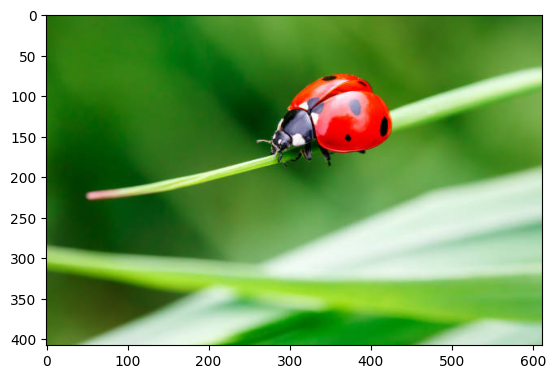

In [2]:
image = plt.imread("test.jpg")
plt.imshow(image)

### KMeans segementation using scikit-learn

In [3]:
X = image.reshape(-1, 3)

In [4]:
kmeans_scikit = KMeans(n_clusters=5, n_init=10)
kmeans_scikit.fit(X)

KMeans(n_clusters=5, n_init=10)

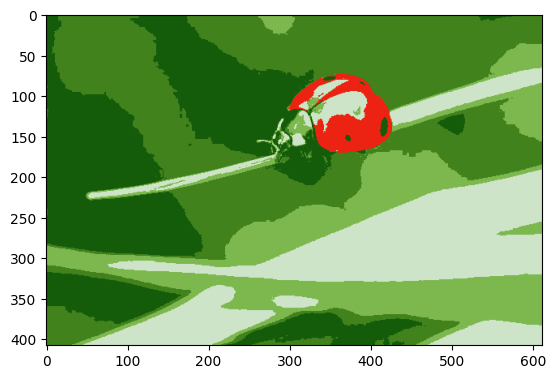

In [5]:
segmented_img_1 = kmeans_scikit.cluster_centers_[kmeans_scikit.labels_]
segmented_img_1 = segmented_img_1.reshape(image.shape)

plt.imshow(segmented_img_1 / 255);

## KMeans segmentation using `CustomKMeans` 

In [6]:
num_clusters = int(input("Cluster number: "))

In [7]:
n_pixels = image.shape[0] * image.shape[1]
image_pixels = image.reshape(n_pixels, -1)

In [8]:
kmeans_custom = CustomKMeans(n_clusters=num_clusters)
kmeans_custom.fit(image_pixels)

In [9]:
cluster_labels = kmeans_custom.predict(image_pixels)

In [10]:
segmented_image = kmeans_custom.centroids[cluster_labels].reshape(image.shape)

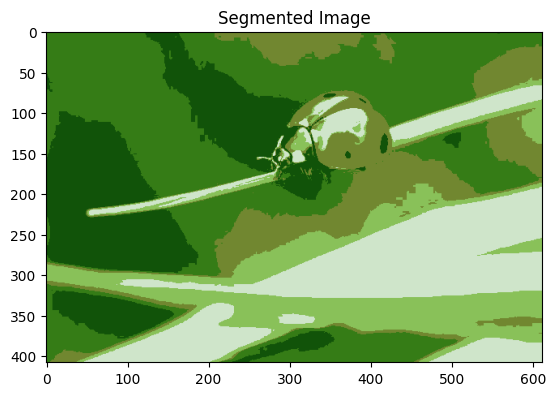

In [11]:
plt.title("Segmented Image")
plt.imshow(segmented_image.astype(np.uint8))
plt.show()

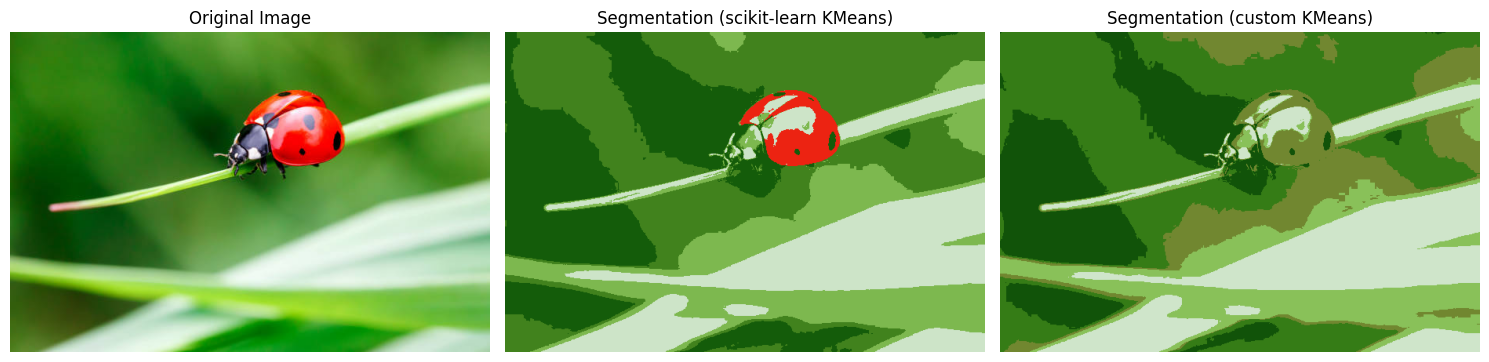

In [12]:
plt.figure(figsize=(15, 5))

# Original image
plt.subplot(131)
plt.title("Original Image")
plt.imshow(image)
plt.axis('off')

# Segmentation using scikit-learn KMeans
plt.subplot(132)
plt.title("Segmentation (scikit-learn KMeans)")
plt.imshow(segmented_img_1.astype(np.uint8))
plt.axis('off')

# Segmentation using custom KMeans
plt.subplot(133)
plt.title("Segmentation (custom KMeans)")
plt.imshow(segmented_image.astype(np.uint8))
plt.axis('off')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()